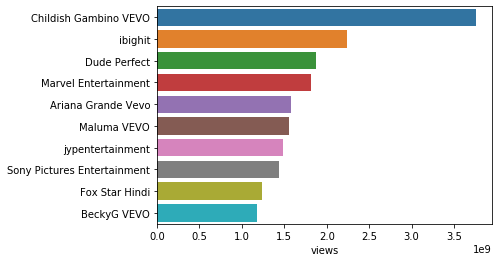

,Unnamed: 0,title,tags,description,new_id
0,0,want talk marriag,shantel martin,shantel channel http www youtub com shantellma...,People & Blogs
1,1,trump presid last week tonight john oliv hbo,last week tonight trump presid last week tonig...,one year presidenti elect john oliv discuss le...,Entertainment
2,2,racist superman rudi mancuso king bach lele pon,racist superman rudi mancuso king bach racist ...,watch previou video n nsubscrib http www youtu...,Comedy
3,3,nickelback lyric real fake,rhett link gmm good mythic morn rhett link goo...,today find link nickelback amateur secret nick...,Entertainment
4,4,dare go bald,ryan higa higatv nigahiga dare idi rhpc dare t...,know sinc show back might best episod yet nlea...,Entertainment


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import datetime
df_1=pd.read_csv("29_data/09_USVideos.csv",encoding = "ISO-8859-1")
df=pd.read_csv("29_data/12_US_cleaned.csv")
df=pd.DataFrame(df)
#df.head()
df_1=pd.DataFrame(df_1)
df_1.head()
a=df_1.groupby("channel_title")["views"].sum()
b=a.nlargest(10)
c=["Childish Gambino VEVO","ibighit",                    
"Dude Perfect","Marvel Entertainment",         
"Ariana Grande Vevo",              
"Maluma VEVO",                     
"jypentertainment",               
"Sony Pictures Entertainment",    
"Fox Star Hindi",                   
"BeckyG VEVO"]
sns.barplot(x=b,y=c)
plt.show()
df.head()

In [5]:
df_1.describe()
#df.groupby("new_id")["views"]

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [8]:
df_1.shape

(40949, 15)

In [110]:
df_1['trending_date'] = pd.to_datetime(df_1['trending_date'],errors='coerce', format='%y.%d.%m')
df_1['publish_time'] = pd.to_datetime(df_1['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

df_1 = df_1[df_1['trending_date'].notnull()]
df_1 = df_1[df_1['publish_time'].notnull()]

df_1 = df_1.dropna(how='any',inplace=False, axis = 0)

df_1.insert(4, 'publish_date', df_1['publish_time'].dt.date)
df_1['publish_time'] = df_1['publish_time'].dt.time

my_df_full = df_1.reset_index().sort_values('trending_date').set_index('video_id')
df_1 = df_1.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')


In [111]:
df_1.head()


,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,,
5x1FAiIq_pQ,2017-11-14,Alicia Keys - When You Were Gone,Alicia Keys,10,2017-11-09,15:49:21,[none],95944,1354,181,117,https://i.ytimg.com/vi/5x1FAiIq_pQ/default.jpg,False,False,False,Find out more in The Vault: http://bit.ly/AK_A...
htvR_dBs3eg,2017-11-14,Sam Smith - The Thrill of It All ALBUM REVIEW,theneedledrop,10,2017-11-10,21:38:57,"album|""review""|""music""|""reviews""|""indie""|""unde...",98422,2926,106,798,https://i.ytimg.com/vi/htvR_dBs3eg/default.jpg,False,False,False,Listen: https://www.youtube.com/watch?v=J_ub7E...
vd4zwINEcLY,2017-11-14,Live in the now!,poofables,24,2011-03-27,04:31:25,"cash|""Wayne's""|""World""|""wayne""|""waynes""|""fende...",95085,909,52,193,https://i.ytimg.com/vi/vd4zwINEcLY/default.jpg,False,False,False,"Stop torturing yourself man, you'll never affo..."
7fm7mll2qvg,2017-11-14,Sigrid - Strangers (Lyric Video),SigridVEVO,10,2017-11-10,00:00:00,"Sigrid|""Strangers""|""Island""|""Records""|""Pop""",91776,4604,46,357,https://i.ytimg.com/vi/7fm7mll2qvg/default.jpg,False,False,False,Listen to Strangers here: https://Sigrid.lnk.t...
q-WipZ9p0wk,2017-11-14,Three meals that cost me $1.50 each,Brothers Green Eats,26,2017-11-09,14:00:08,"brothers green eats|""budget cooking""|""cooking ...",77630,1991,83,208,https://i.ytimg.com/vi/q-WipZ9p0wk/default.jpg,False,False,False,Welcome to day three of cooking for the price ...


In [112]:
fre_df = pd.DataFrame(df_1.groupby(['category_id']).count()['title'].sort_values(ascending=False)).reset_index()

fre_df.tail()


,category_id,title
11,20,101
12,2,69
13,19,59
14,29,13
15,43,4


Text(0,0.5,'Count')

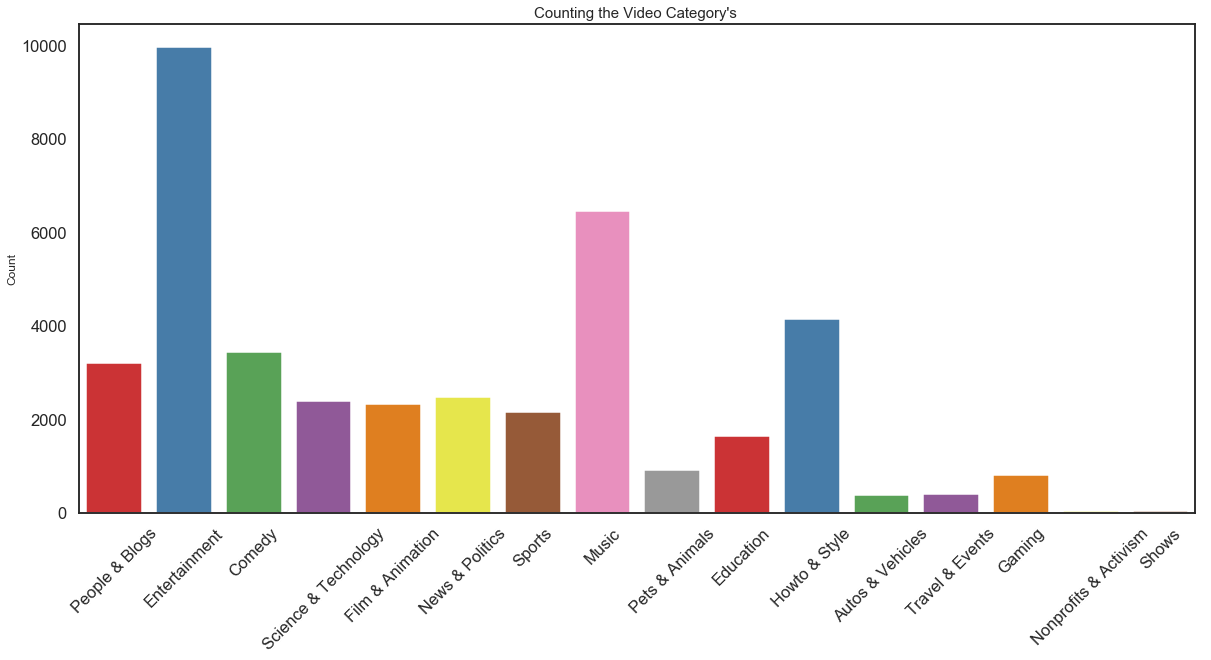

In [113]:
plt.figure(figsize = (20,9))

g = sns.countplot('new_id', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)


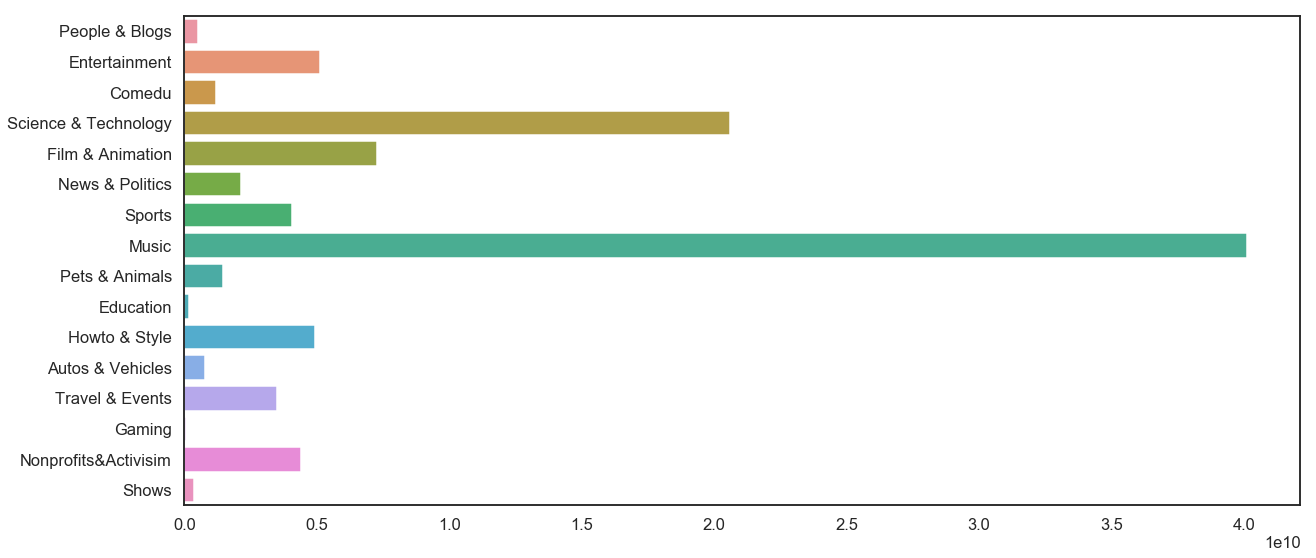

In [114]:
plt.figure(figsize = (20,9))
#print(df.groupby('new_id')['views'].sum())
a=np.array(df.groupby('new_id')['views'].sum())
b=["People & Blogs","Entertainment","Comedu","Science & Technology","Film & Animation","News & Politics","Sports","Music","Pets & Animals","Education","Howto & Style","Autos & Vehicles","Travel & Events","Gaming","Nonprofits&Activisim","Shows"]
sns.barplot(x=a,y=b)

[1355965.40885417 1480308.42001736  712940.81521739 2067883.19901646
 3106250.20085288 2620830.63035496  983730.11673903 6201003.11959209
  592587.73783675 2963884.07017544 1531835.42866044  831143.46630435
 1452626.7455227   903527.33333333 2025969.03081877  854619.6119403 ]


Text(0.5,1,'Average number of views per video')

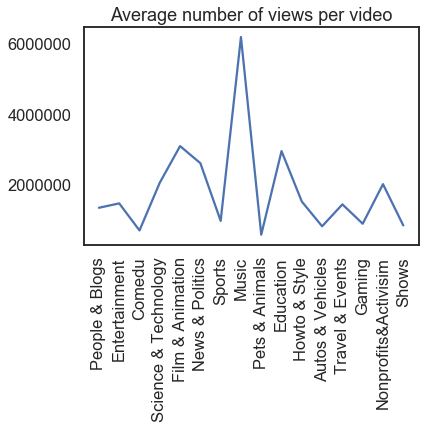

In [115]:
averageviews=a/np.array(df.groupby('new_id')["views"].count())
print(averageviews)
plt.plot(b,averageviews)
plt.xticks(rotation='vertical')
plt.title("Average number of views per video")

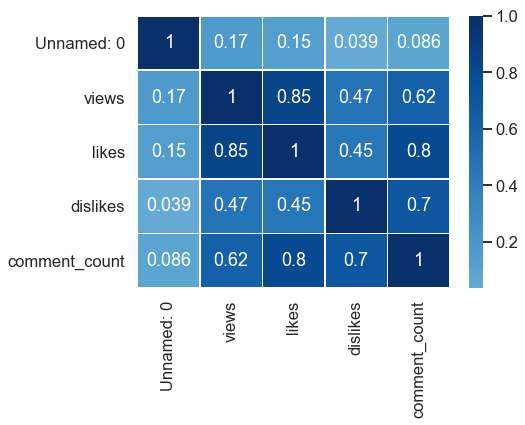

In [116]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,center=0, linewidth=0.5 , cmap = 'Blues')


In [117]:
df.describe()

,Unnamed: 0,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,20474.000000,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,11821.102423,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,0.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10237.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,20474.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,30711.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,40948.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


C:\Users\risha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\risha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\risha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\risha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\risha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

(array([5., 1., 1., 1., 2.]),
 array([ 2160639. ,  6514995.4, 10869351.8, 15223708.2, 19578064.6,
        23932421. ]),
 <a list of 1 Patch objects>)

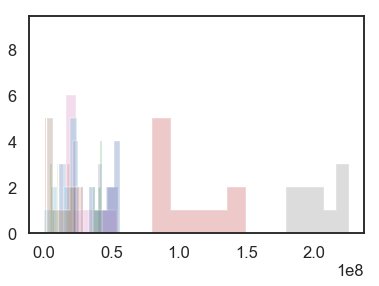

In [118]:

categoricalviews = df.groupby(['new_id']).views.nlargest(10)
'''
df_2=np.array(categoricalviews)

dataframetry=pd.DataFrame(df.groupby(['new_id','channel_title']).views.sum())

data_array=np.array([[[df['new_id']],[df['channel_title']],[df.groupby(['new_id','channel_title']).views.sum()]]])
'''
categoricalviews=np.array(categoricalviews)
cat_1=categoricalviews[0:10]
cat_2=categoricalviews[10:20]
cat_3=categoricalviews[20:30]
cat_4=categoricalviews[30:40]
cat_5=categoricalviews[40:50]
cat_6=categoricalviews[50:60]
cat_7=categoricalviews[60:70]
cat_8=categoricalviews[70:80]
cat_9=categoricalviews[80:90]
cat_10=categoricalviews[90:100]
cat_11=categoricalviews[100:110]
cat_12=categoricalviews[110:120]
cat_13=categoricalviews[120:130]
cat_14=categoricalviews[130:140]
cat_15=categoricalviews[140:150]
cat_16=categoricalviews[150:160]
kwargs = dict(histtype='stepfilled', alpha=0.3, normed= False,bins=5)
plt.hist(cat_1,**kwargs)
plt.hist(cat_2,**kwargs)
plt.hist(cat_3,**kwargs)
plt.hist(cat_4,**kwargs)
plt.hist(cat_5,**kwargs)
plt.hist(cat_6,**kwargs)
plt.hist(cat_7,**kwargs)
plt.hist(cat_8,**kwargs)
plt.hist(cat_9,**kwargs)
plt.hist(cat_10,**kwargs)
plt.hist(cat_11,**kwargs)
plt.hist(cat_12,**kwargs)
plt.hist(cat_13,**kwargs)
plt.hist(cat_14,**kwargs)
plt.hist(cat_15,**kwargs)
plt.hist(cat_16,**kwargs)

In [119]:
my_df=df_1
my_df['category_id'] = my_df['category_id'].astype(str)
my_df_full['category_id'] = my_df['category_id'].astype(str)

category_id = {}

with open('US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']

my_df.insert(4, 'category', my_df['category_id'].map(category_id))
my_df_full.insert(4, 'category', my_df_full['category_id'].map(category_id))
category_list = my_df['category'].unique()


In [120]:
my_df.head()

,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,,,
5x1FAiIq_pQ,2017-11-14,Alicia Keys - When You Were Gone,Alicia Keys,10,Music,2017-11-09,15:49:21,[none],95944,1354,181,117,https://i.ytimg.com/vi/5x1FAiIq_pQ/default.jpg,False,False,False,Find out more in The Vault: http://bit.ly/AK_A...
htvR_dBs3eg,2017-11-14,Sam Smith - The Thrill of It All ALBUM REVIEW,theneedledrop,10,Music,2017-11-10,21:38:57,"album|""review""|""music""|""reviews""|""indie""|""unde...",98422,2926,106,798,https://i.ytimg.com/vi/htvR_dBs3eg/default.jpg,False,False,False,Listen: https://www.youtube.com/watch?v=J_ub7E...
vd4zwINEcLY,2017-11-14,Live in the now!,poofables,24,Entertainment,2011-03-27,04:31:25,"cash|""Wayne's""|""World""|""wayne""|""waynes""|""fende...",95085,909,52,193,https://i.ytimg.com/vi/vd4zwINEcLY/default.jpg,False,False,False,"Stop torturing yourself man, you'll never affo..."
7fm7mll2qvg,2017-11-14,Sigrid - Strangers (Lyric Video),SigridVEVO,10,Music,2017-11-10,00:00:00,"Sigrid|""Strangers""|""Island""|""Records""|""Pop""",91776,4604,46,357,https://i.ytimg.com/vi/7fm7mll2qvg/default.jpg,False,False,False,Listen to Strangers here: https://Sigrid.lnk.t...
q-WipZ9p0wk,2017-11-14,Three meals that cost me $1.50 each,Brothers Green Eats,26,Howto & Style,2017-11-09,14:00:08,"brothers green eats|""budget cooking""|""cooking ...",77630,1991,83,208,https://i.ytimg.com/vi/q-WipZ9p0wk/default.jpg,False,False,False,Welcome to day three of cooking for the price ...


In [121]:
fre_df = pd.DataFrame(my_df_full.groupby([my_df_full.category]).count()['title'].sort_values(ascending=False)).reset_index()
fre_df

,category,title
0,Entertainment,9823
1,Music,6439
2,Howto & Style,4136
3,Comedy,3429
4,People & Blogs,3055
5,News & Politics,2408
6,Science & Technology,2365
7,Film & Animation,2348
8,Sports,2113
9,Education,1646


In [122]:
publish_to_trend = {}
my_df_first = my_df_full.reset_index().drop_duplicates('video_id',keep ='first').set_index('video_id')
diff_first = (my_df_first['trending_date']).astype('datetime64[ns]')-my_df_first['publish_date'].astype('datetime64[ns]')

diff_first = diff_first.reset_index()
diff_first.columns = ['video_id','publish_to_trend']

for i, row in diff_first.iterrows():
    publish_to_trend[row['video_id']] = row['publish_to_trend'].days

my_df_last = my_df
diff_last = my_df['trending_date'].astype('datetime64[ns]')-my_df['publish_date'].astype('datetime64[ns]')
diff_last = diff_last.reset_index()
diff_last.columns = ['video_id','publish_to_trend_last']
my_df = my_df.reset_index()
my_df.insert(4,'publish_to_trend_last', diff_last['publish_to_trend_last'].astype('timedelta64[D]').astype(int))
my_df.insert(4, 'publish_to_trend', my_df['video_id'].map(publish_to_trend))
my_df.insert(4, 'trend_duration', 0)
my_df['trend_duration'] = (my_df['publish_to_trend_last']-my_df['publish_to_trend'])+1
my_df.set_index('video_id')[['publish_to_trend','trend_duration']].sort_values('trend_duration',ascending=False).head()


,publish_to_trend,trend_duration
video_id,,
jYuQzAxBVZU,5,32
f4FuOi9rvKw,5,32
oJ2faqXlU1s,4,32
i5qOzqD9Rms,1,31
M4ZoCHID9GI,2,31


Text(0.5,1,'Category v/s Trending Duration')

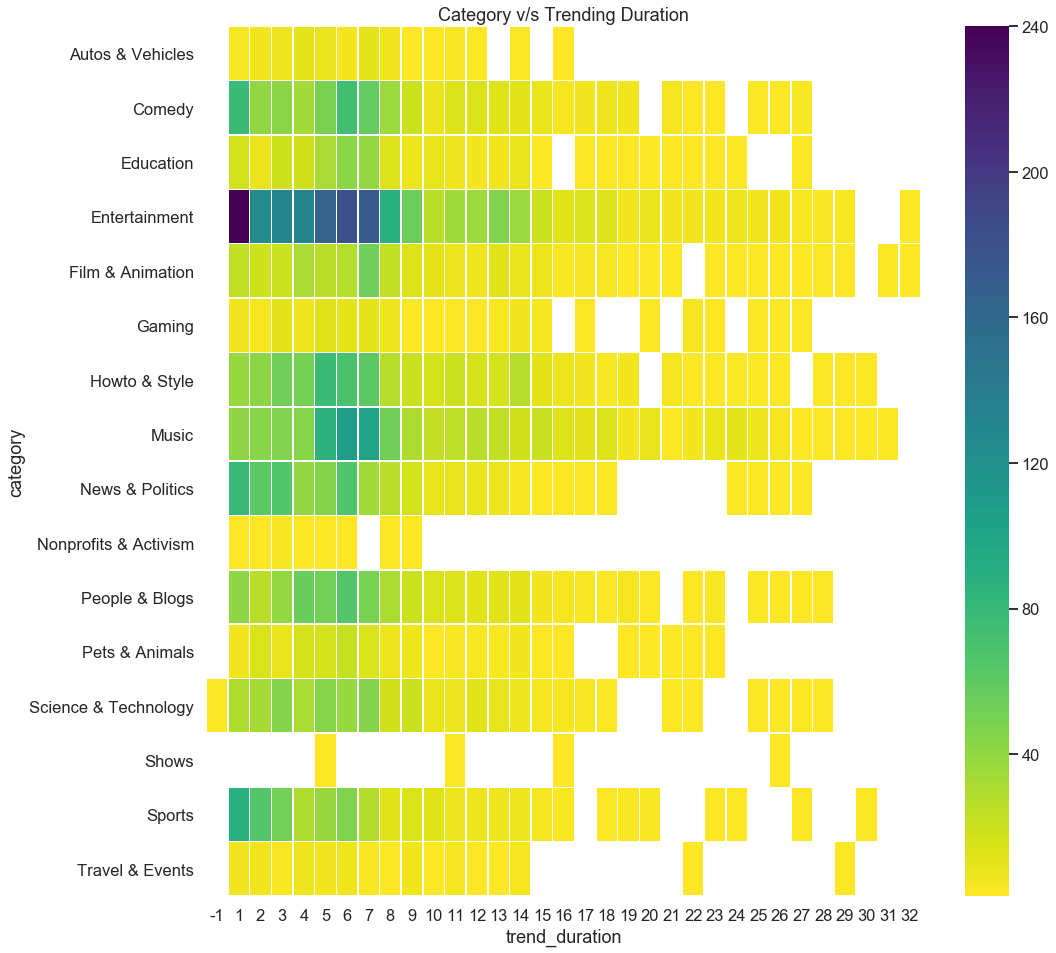

In [123]:
cat_trend_duration= my_df.groupby(['category','trend_duration']).count()['video_id'].unstack().clip(upper=300)
plt.figure(figsize=(16,16))

sns.heatmap(cat_trend_duration,cmap='viridis_r', linewidth=0.5)
plt.title("Category v/s Trending Duration")

In [124]:
olormap PrGn is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

SyntaxError: invalid syntax (<ipython-input-124-9f6b66843475>, line 1)

Text(0.5,1,'Correlation between Days from Publish v/s Trend and Trending Duration')

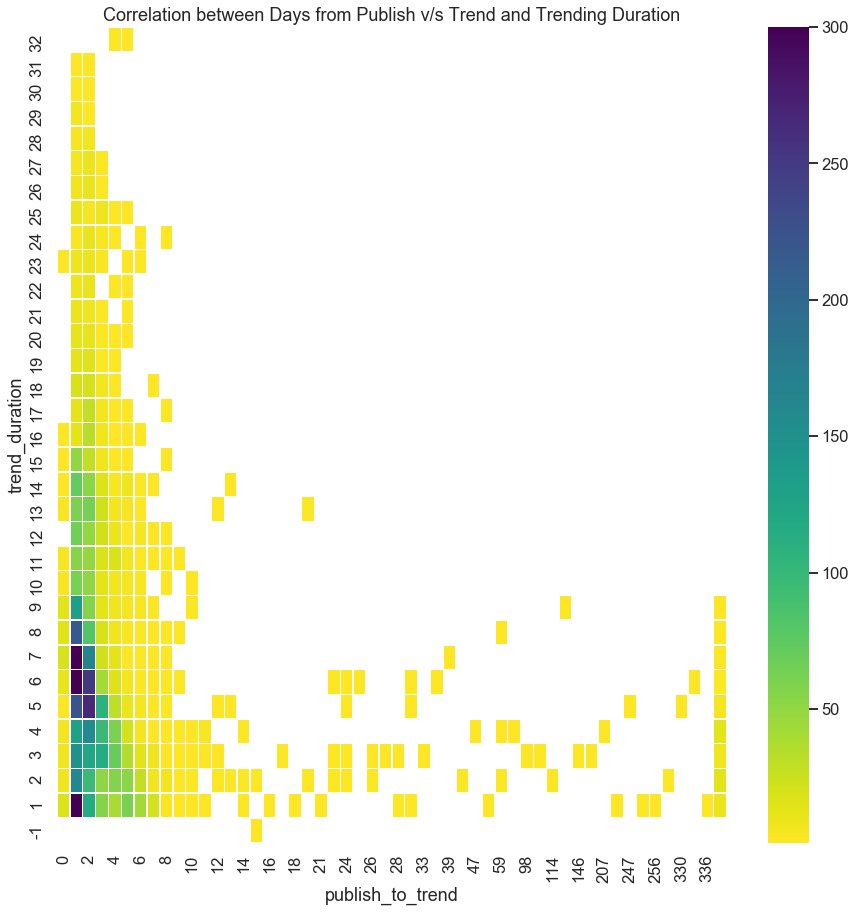

In [105]:
my_df['publish_to_trend'] = my_df['publish_to_trend'].clip(upper=36
cat_trend_duration= my_df.groupby(['trend_duration','publish_to_trend']).count()['video_id'].unstack().clip(upper=300)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cat_trend_duration, cmap='viridis_r',linewidth=0.5)
ax.invert_yaxis()
plt.title("Correlation between Days from Publish v/s Trend and Trending Duration")

In [67]:
cdf = my_df["publish_date"].value_counts().to_frame().reset_index().rename(columns={"index": "publish_date", "publish_date": "No_of_videos"})

print(cdf)
'''
fig, ax = plt.subplots()
_ = sns.barplot(x="publish_date", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")
'''


    publish_date  No_of_videos
0     2018-02-05            70
1     2017-12-13            69
2     2017-12-12            66
3     2018-01-29            66
4     2017-11-15            61
5     2017-11-28            60
6     2018-01-26            60
7     2018-01-16            59
8     2017-12-05            58
9     2017-11-21            57
10    2017-11-29            56
11    2018-02-01            56
12    2017-12-20            56
13    2017-11-09            55
14    2018-01-31            55
15    2017-11-20            55
16    2018-01-24            54
17    2017-12-14            53
18    2017-11-17            53
19    2017-11-22            53
20    2017-12-06            53
21    2017-12-08            53
22    2017-11-13            53
23    2018-01-12            53
24    2017-11-16            53
25    2018-01-11            52
26    2018-01-18            52
27    2017-11-14            51
28    2017-11-10            50
29    2017-12-19            50
..           ...           ...
273   20

'\nfig, ax = plt.subplots()\n_ = sns.barplot(x="publish_date", y="No_of_videos", data=cdf, \n                palette=sns.color_palette([\'#003f5c\', \'#374c80\', \'#7a5195\', \n                                           \'#bc5090\', \'#ef5675\', \'#ff764a\', \'#ffa600\'], n_colors=7), ax=ax)\n_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")\n'

KeyboardInterrupt: 

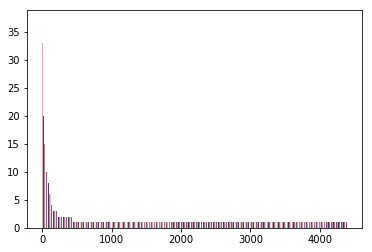

In [68]:
cdf = my_df["publish_time"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publish_time", "publish_time": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publish_time", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

In [129]:
from wordcloud import WordCloud
import nltk
nltk.download()
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


Text(0.5,1,'Polarity of Categories in Youtube videos')

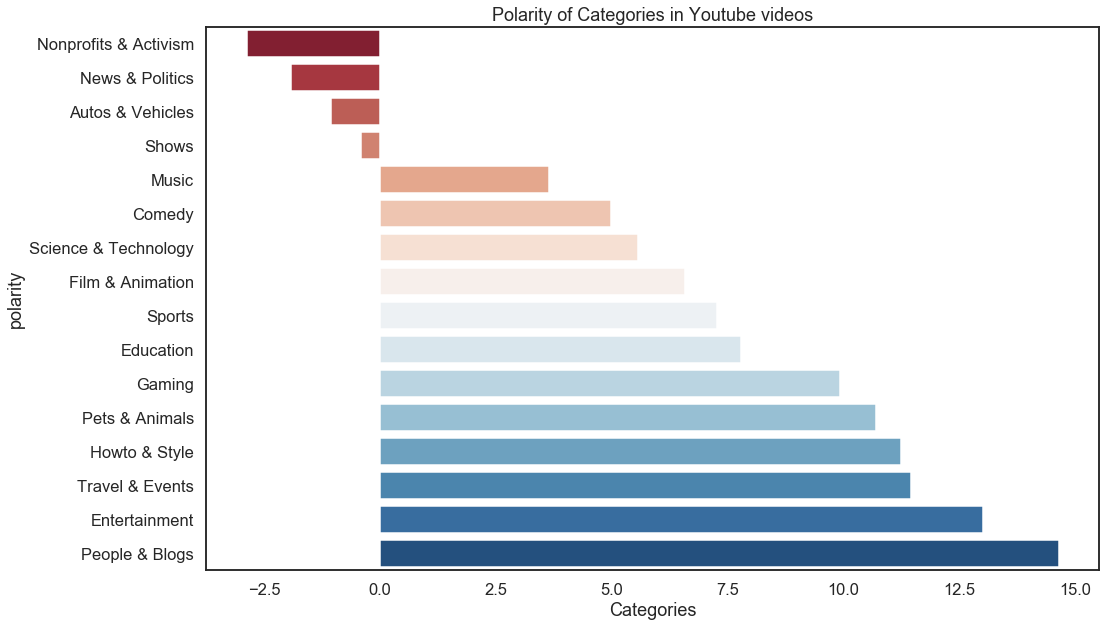

In [130]:

#remove all the stopwords from the text
en_stopwords = list(stopwords.words('english'))
de_stopwords = list(stopwords.words('german'))   
fr_stopwords = list(stopwords.words('french'))   
en_stopwords.extend(de_stopwords)
en_stopwords.extend(fr_stopwords)

polarities = list()

for cate in category_list:
    tags_word = my_df[my_df['category']==cate]['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
    tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
    word_tokens = word_tokenize(tags_word)
    filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]      
    
# Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data_title)
    hnhk = pd.DataFrame(word_dist.most_common(MAX_N),
                    columns=['Word', 'Frequency'])

    compound = .0
    for word in hnhk['Word'].head(MAX_N):
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']

    polarities.append(compound)

category_list = pd.DataFrame(category_list)
polarities = pd.DataFrame(polarities)
tags_sentiment = pd.concat([category_list,polarities],axis=1)
tags_sentiment.columns = ['category','polarity']
tags_sentiment=tags_sentiment.sort_values('polarity').reset_index()

plt.figure(figsize=(16,10))
sns.set(style="white",context="talk")
ax = sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['category'], data=tags_sentiment,orient='h',palette="RdBu")
plt.xlabel("Categories")
plt.ylabel("polarity")
plt.title("Polarity of Categories in Youtube videos")

In [79]:
print("hi")

hi
